# Meal Predict EDA

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [205]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
# submission = pd.read_csv("./data/sample_submission.csv")

print(train_df.shape, test_df.shape)
train_df.head()

(1205, 12) (50, 10)


,date,week_day,member,day_off,business_trip,overtime_accept,work_from_home,breakfast,lunch,dinner,total_lunch,total_dinner
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [206]:
train_df.tail()

,date,week_day,member,day_off,business_trip,overtime_accept,work_from_home,breakfast,lunch,dinner,total_lunch,total_dinner
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0


In [227]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1205 non-null   datetime64[ns]
 1   week_day         1205 non-null   int64         
 2   member           1205 non-null   int64         
 3   day_off          1205 non-null   int64         
 4   business_trip    1205 non-null   int64         
 5   overtime_accept  1205 non-null   int64         
 6   work_from_home   1205 non-null   float64       
 7   breakfast        1205 non-null   object        
 8   lunch            1205 non-null   object        
 9   dinner           1205 non-null   object        
 10  total_lunch      1205 non-null   float64       
 11  total_dinner     1205 non-null   float64       
 12  year             1205 non-null   int64         
 13  month            1205 non-null   int64         
 14  day              1205 non-null   int64  

In [228]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             50 non-null     datetime64[ns]
 1   week_day         50 non-null     int64         
 2   member           50 non-null     int64         
 3   day_off          50 non-null     int64         
 4   business_trip    50 non-null     int64         
 5   overtime_accept  50 non-null     int64         
 6   work_from_home   50 non-null     float64       
 7   breakfast        50 non-null     object        
 8   lunch            50 non-null     object        
 9   dinner           50 non-null     object        
 10  year             50 non-null     int64         
 11  month            50 non-null     int64         
 12  day              50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(3)
memory usage: 5.2+ KB


## date → datetime 으로 type 변경

In [207]:
train_df["date"] = pd.to_datetime(train_df["date"], format="%Y-%m-%d")
test_df["date"] = pd.to_datetime(test_df["date"], format="%Y-%m-%d")

# train_df["date"].head()

## day numeric mapping

In [208]:
day = {'월':2, '화':3, '수':4, '목':5, '금':6}

train_df["week_day"] = train_df["week_day"].map(day)
test_df["week_day"] = test_df["week_day"].map(day)
# train_df["day"].head()

## Select numeric features

## separate date

In [209]:
train_df['year'] = train_df["date"].dt.year
train_df['month'] = train_df["date"].dt.month
train_df['day'] = train_df["date"].dt.day


test_df['year'] = test_df["date"].dt.year
test_df['month'] = test_df["date"].dt.month
test_df['day'] = test_df["date"].dt.day

train_df.head()

,date,week_day,member,day_off,business_trip,overtime_accept,work_from_home,breakfast,lunch,dinner,total_lunch,total_dinner,year,month,day
0,2016-02-01,2,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,3,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,4,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,5,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,6,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


---------

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


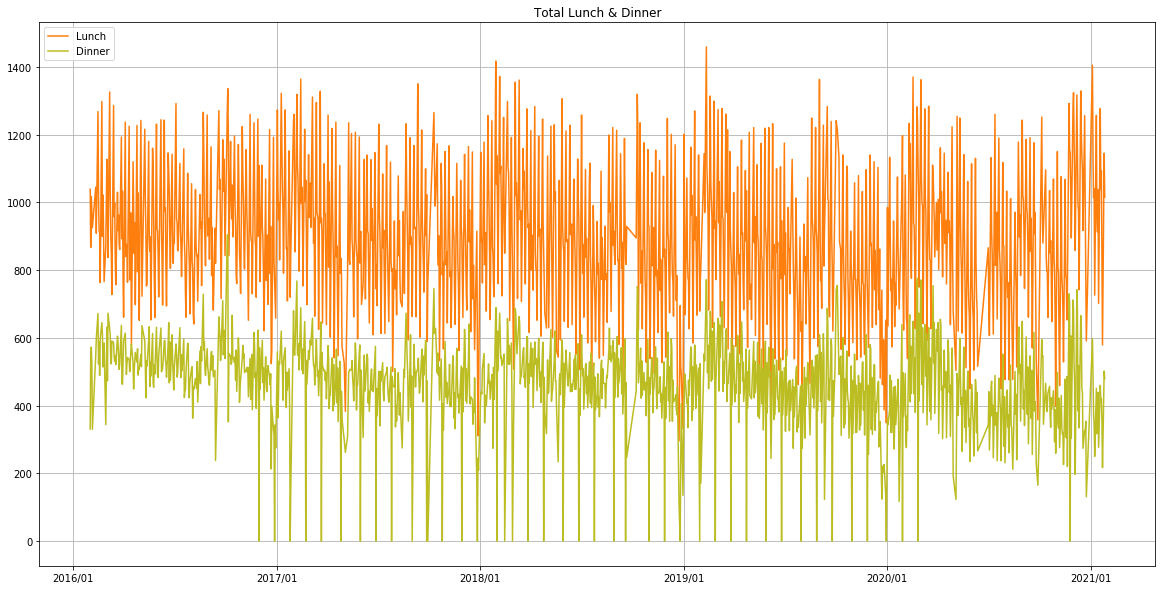

In [210]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_df["date"], train_df["total_lunch"], color='tab:orange', label="Lunch")

ax.plot(train_df["date"], train_df["total_dinner"], color='tab:olive', label='Dinner')

ax.set_title('Total Lunch & Dinner')
ax.legend(loc='upper left')
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
ax.grid(True)
plt.show()

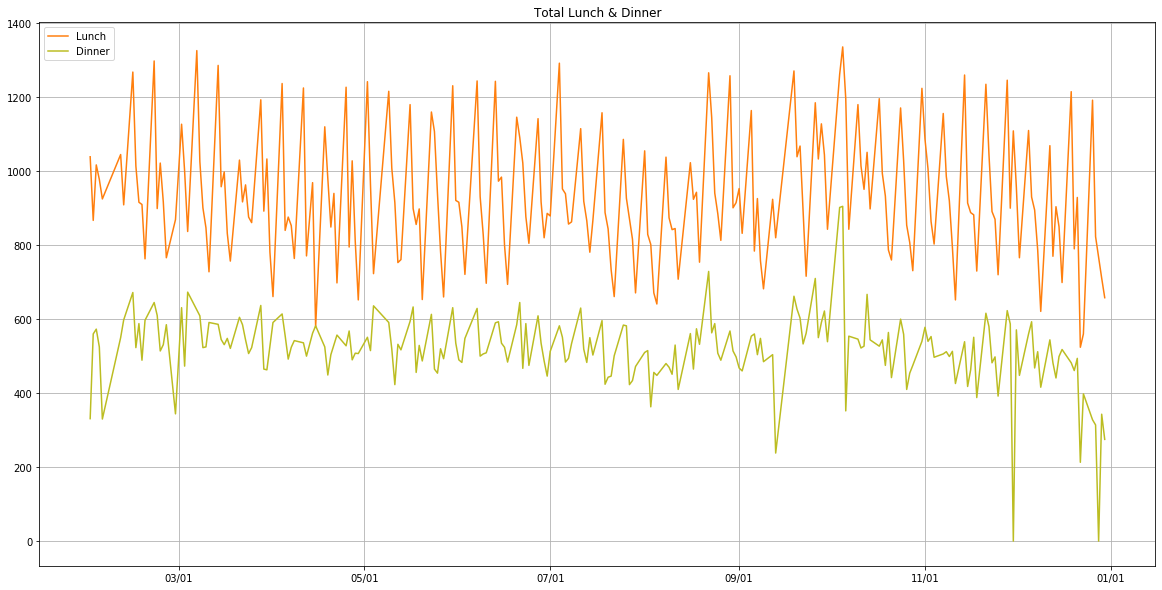

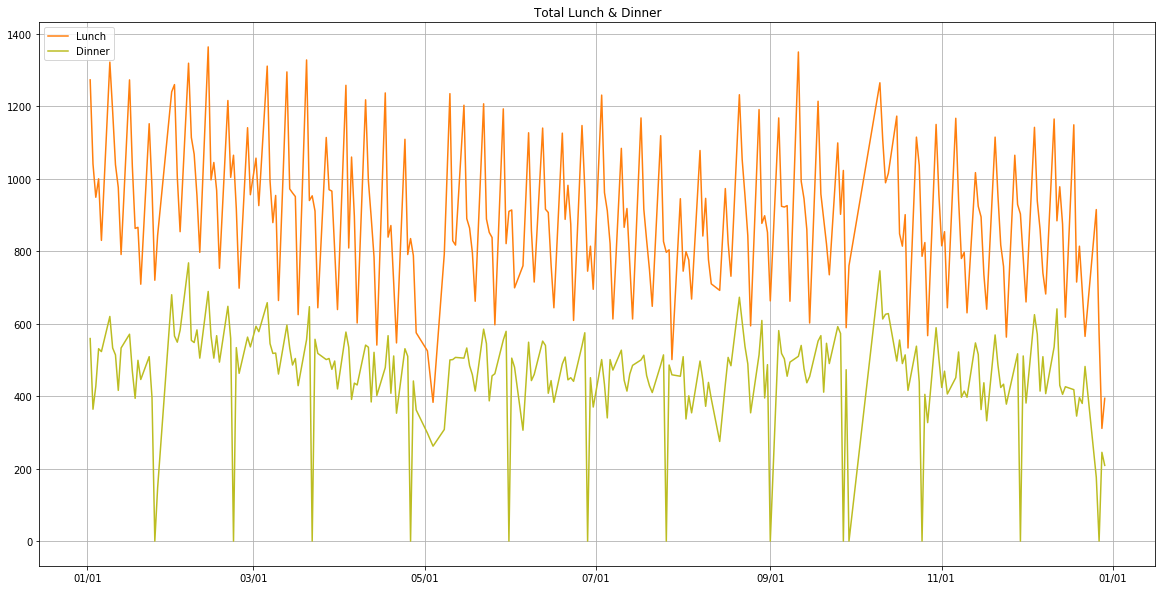

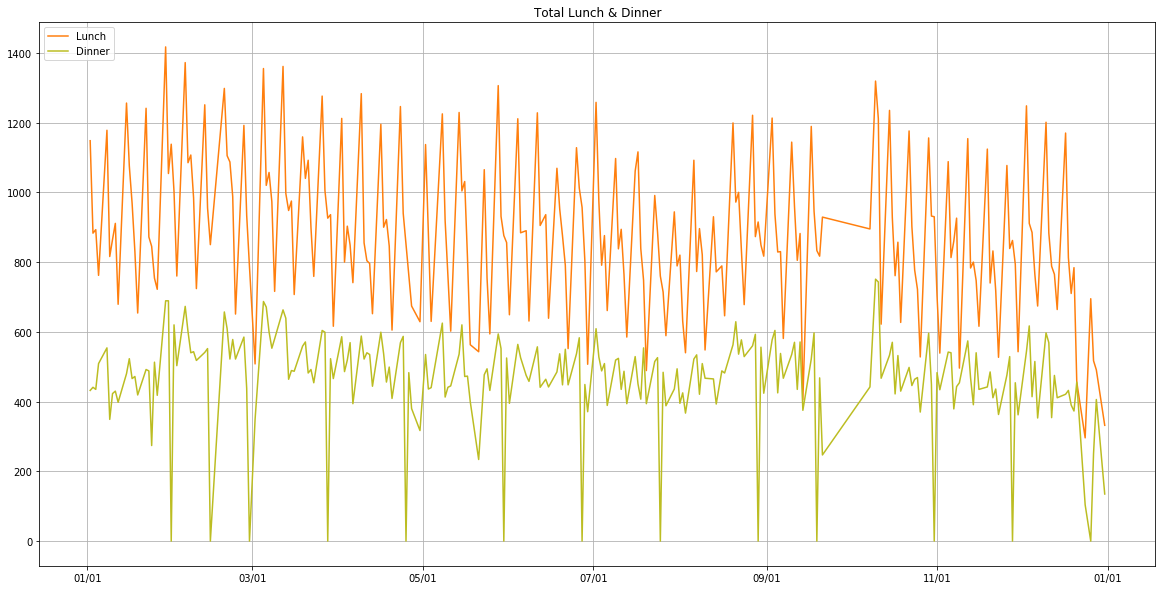

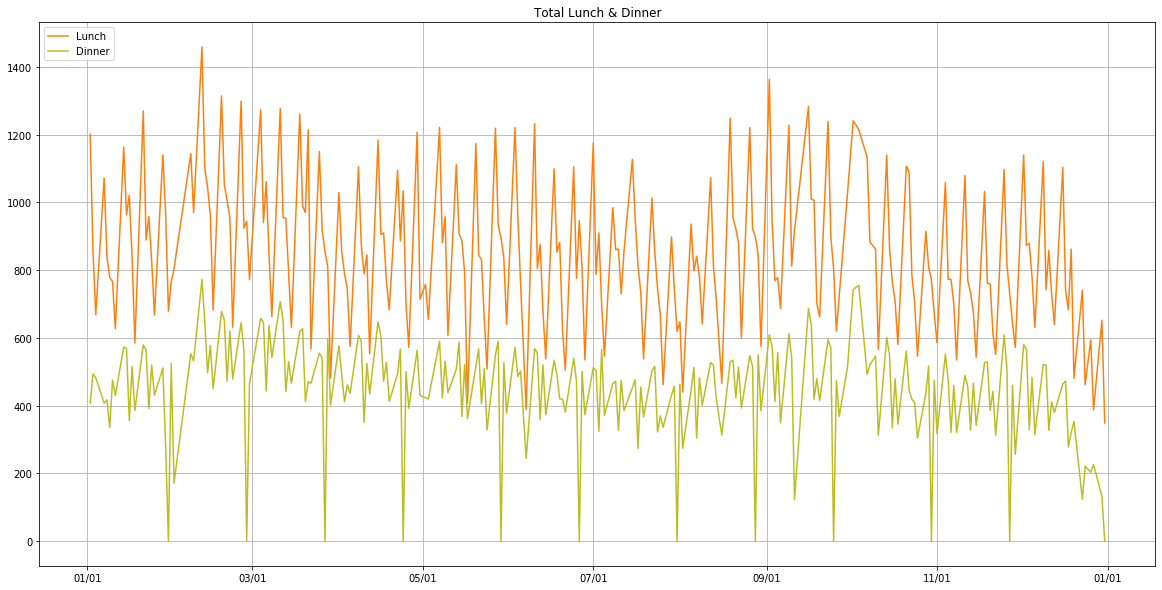

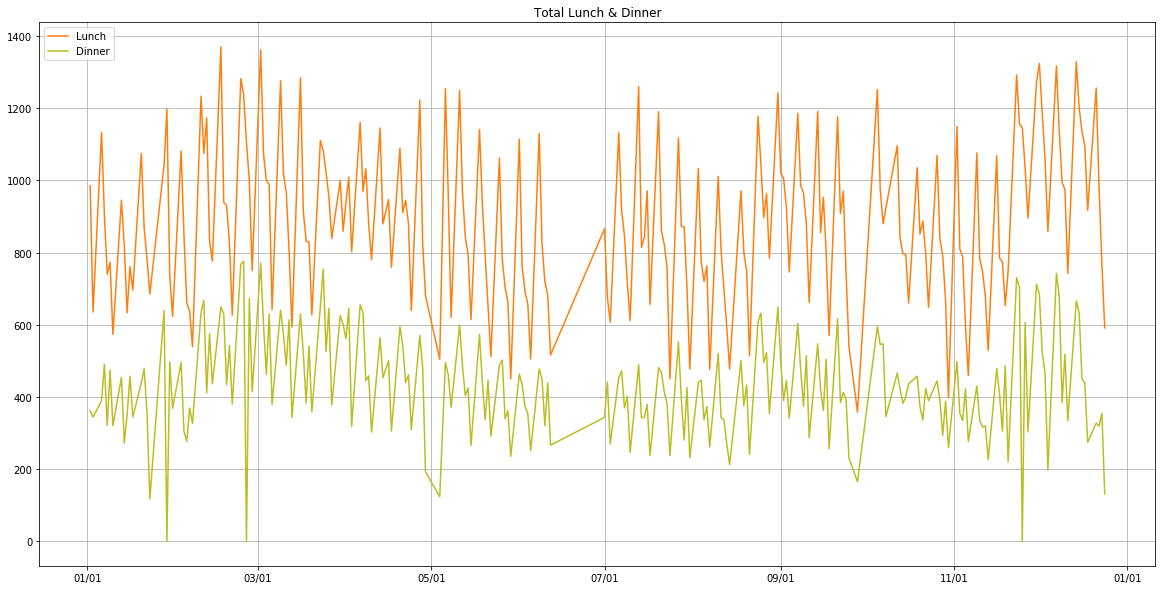

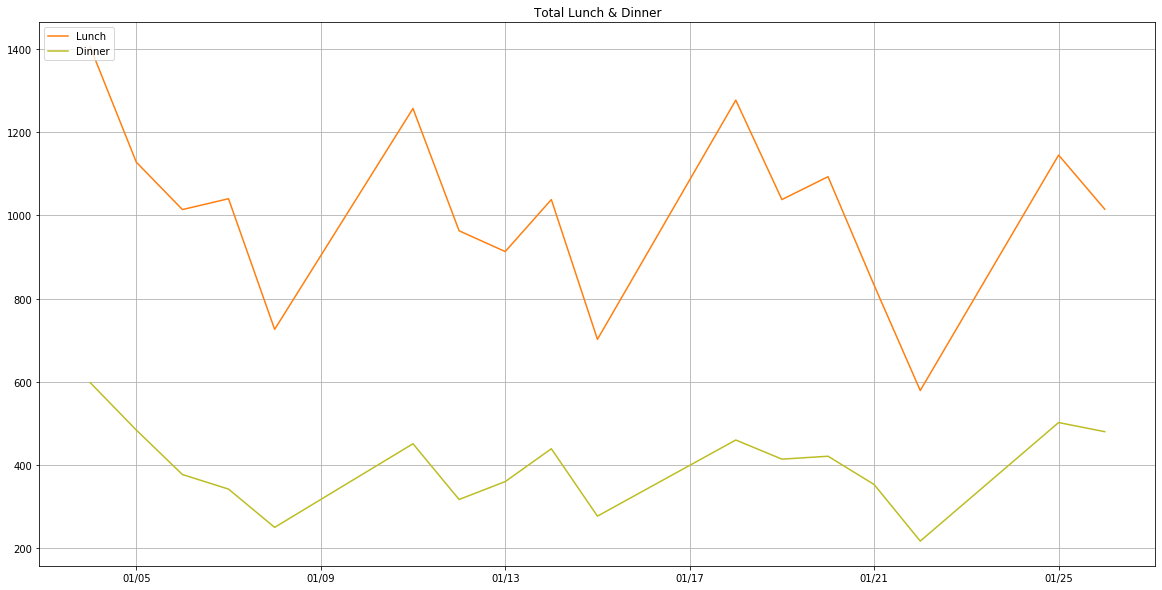

In [212]:
for key, df in train_df.groupby("year"):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df["date"], df["total_lunch"], color='tab:orange', label="Lunch")

    ax.plot(df["date"], df["total_dinner"], color='tab:olive', label='Dinner')

    ax.set_title('Total Lunch & Dinner')
    ax.legend(loc='upper left')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.grid(True)
    plt.show()

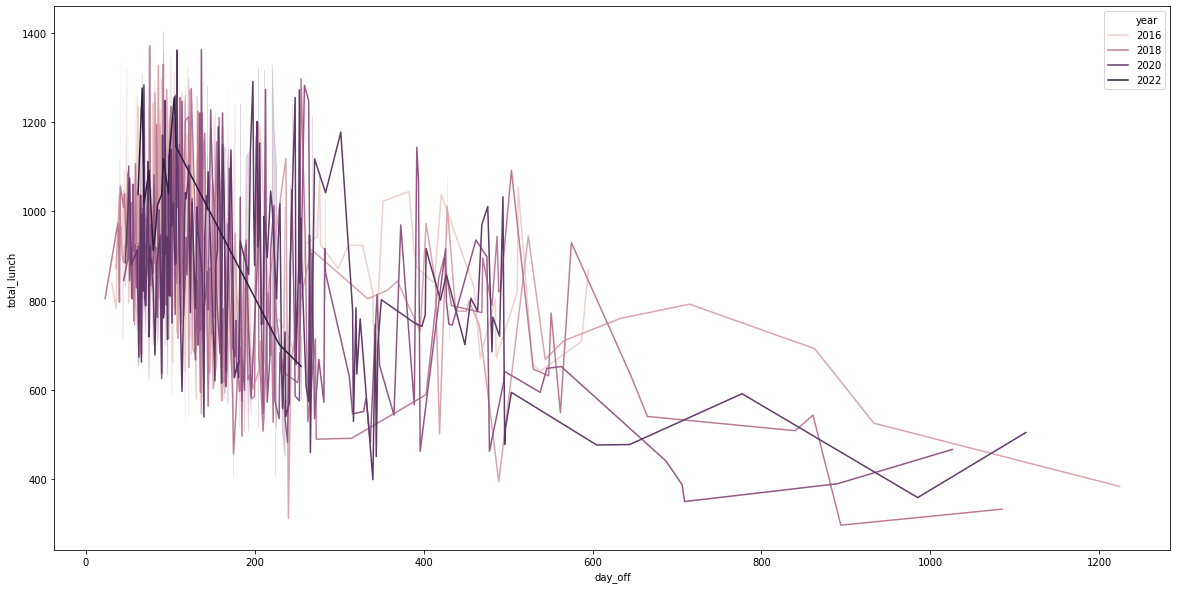

In [229]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=train_df, x="day_off", y="total_lunch", hue="year")
# sns.lineplot(data=train_df, x="date", y="total_dinner", hue="year")
